# Arxiv Dataset Clustering
This notebook aims to cluster scholarly articles from the Arxiv dataset.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Preview Data

In [2]:
input_file = '../data/data_concatenated.csv'
df = pd.read_csv(input_file)
df.head()

,categories,update_date,concat
0,math.CT cs.CL,2007-05-23,resource modality game semantics description r...
1,math.CV math.DG,2007-05-23,bishop surface vanishing bishop invariant deri...
2,math.OA,2007-05-23,subfactors hadamard matrix complex hadamard ma...
3,astro-ph,2007-05-23,sensitivity solar offlimb line profile electro...
4,cs.DB,2007-05-23,worstcase background knowledge privacypreservi...


## Text Vectorization

In [3]:
def vectorize_text(df):
    # Replace NaN values in the 'concat' column with empty strings
    df['concat'] = df['concat'].fillna('')
    # Instantiate TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=2000)
    X = vectorizer.fit_transform(df['concat'])
    return X, vectorizer

tfidf_matrix, vectorizer = vectorize_text(df)

## Dimensionality Reduction

In [4]:
def reduce_dimensionality(X):
    svd = TruncatedSVD(n_components=50)
    X_reduced = svd.fit_transform(X)
    return X_reduced

X_reduced = reduce_dimensionality(tfidf_matrix)

## Visual Inspection using t-SNE

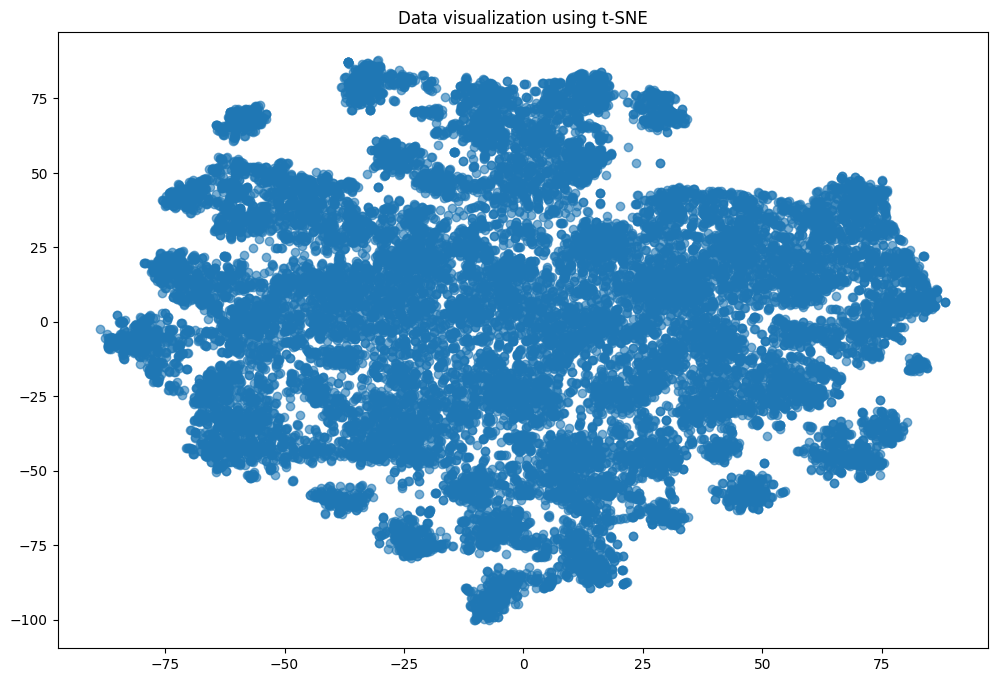

In [14]:
def visualize_tsne(X):
    # Taking a random sample of 10% of the data
    sample_indices = np.random.choice(X.shape[0], int(0.01 * X.shape[0]), replace=False)
    X_sample = X[sample_indices]

    tsne = TSNE(n_components=2, random_state=0)
    X_tsne = tsne.fit_transform(X_sample)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6)
    plt.title('Data visualization using t-SNE')
    plt.show()



visualize_tsne(X_reduced)

## Determine Optimal Clusters using Silhouette Score

For n_clusters=2, The Silhouette Coefficient is 0.05716773357855025
For n_clusters=3, The Silhouette Coefficient is 0.04637312456920438
For n_clusters=4, The Silhouette Coefficient is 0.05525562449050648
For n_clusters=5, The Silhouette Coefficient is 0.06268290462315668
For n_clusters=6, The Silhouette Coefficient is 0.06691445328251674
For n_clusters=7, The Silhouette Coefficient is 0.06912632863543221
For n_clusters=8, The Silhouette Coefficient is 0.04287723511567028
For n_clusters=9, The Silhouette Coefficient is 0.05020661240286003
For n_clusters=10, The Silhouette Coefficient is 0.06486663232635935
For n_clusters=11, The Silhouette Coefficient is 0.06194127961827837
For n_clusters=12, The Silhouette Coefficient is 0.06642119757244588
For n_clusters=13, The Silhouette Coefficient is 0.07505227671332698
For n_clusters=14, The Silhouette Coefficient is 0.08124442790196279
For n_clusters=15, The Silhouette Coefficient is 0.07022285204946246
For n_clusters=16, The Silhouette Coeffici

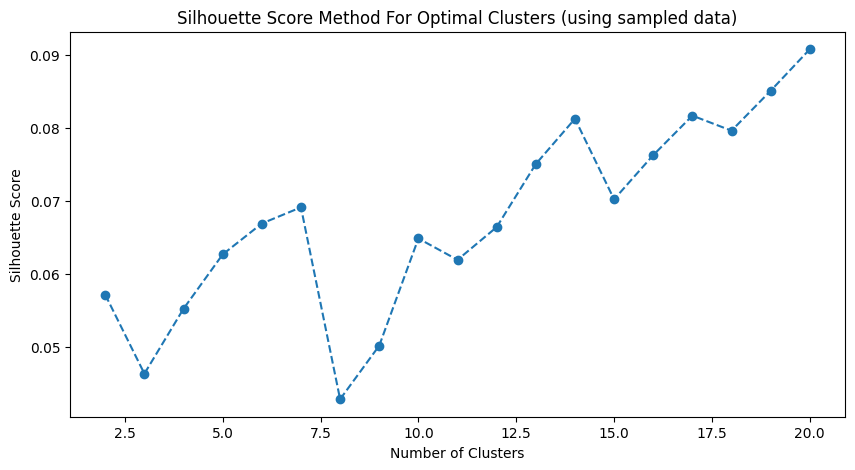

In [13]:
def optimal_clusters_silhouette(X):
    silhouette_scores = []
    range_clusters = range(2, 21)
    
    # Taking a random sample of 10% of the data
    sample_indices = np.random.choice(X.shape[0], int(0.01 * X.shape[0]), replace=False)
    X_sample = X[sample_indices]
    
    for n_cluster in range_clusters:
        kmeans = KMeans(n_clusters=n_cluster, n_init='auto', random_state=0).fit(X_sample)
        label = kmeans.labels_
        sil_coeff = silhouette_score(X_sample, label, metric='euclidean')
        silhouette_scores.append(sil_coeff)
        print(f"For n_clusters={n_cluster}, The Silhouette Coefficient is {sil_coeff}")

    plt.figure(figsize=(10,5))
    plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score Method For Optimal Clusters (using sampled data)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

optimal_clusters_silhouette(X_reduced)

## Determine Optimal Clusters

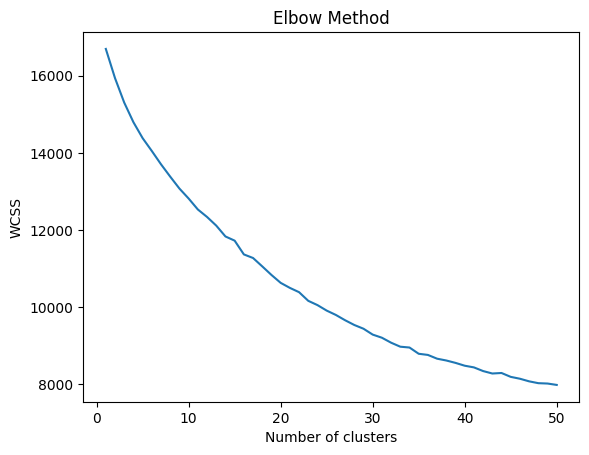

In [11]:
def determine_optimal_clusters(X):

    # Taking a random sample of 10% of the data
    sample_indices = np.random.choice(X.shape[0], int(0.05 * X.shape[0]), replace=False)
    X_sample = X[sample_indices]

    wcss = []
    for i in range(1, 51):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(X_sample)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 51), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

determine_optimal_clusters(X_reduced)

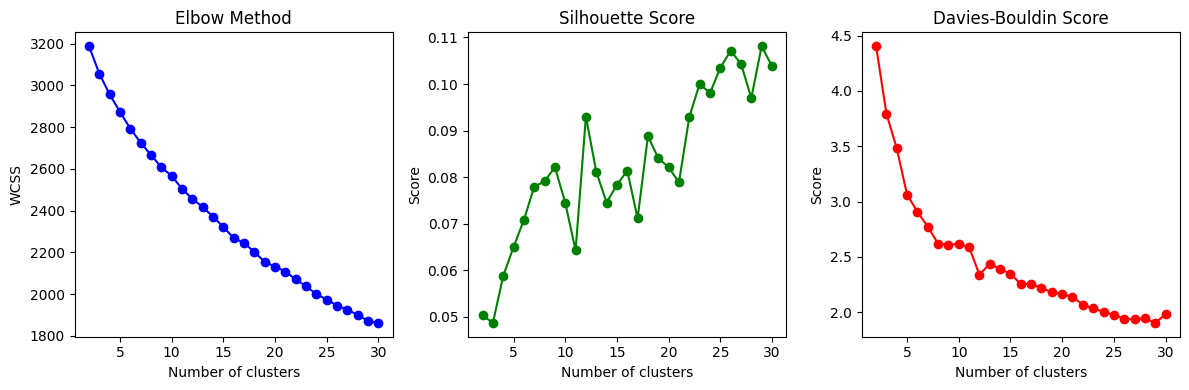

In [19]:
def determine_optimal_clusters(X):
    wcss = []
    silhouette_scores = []
    davies_bouldin_scores = []

    # Taking a random sample of 10% of the data
    sample_indices = np.random.choice(X.shape[0], int(0.01 * X.shape[0]), replace=False)
    X_sample = X[sample_indices]

    # Define a range of clusters to test
    cluster_range = range(2, 31)

    for i in cluster_range:
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(X_sample)
        wcss.append(kmeans.inertia_)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X_sample, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

        # Calculate Davies-Bouldin index
        davies_bouldin_avg = davies_bouldin_score(X_sample, kmeans.labels_)
        davies_bouldin_scores.append(davies_bouldin_avg)

    # Plot the elbow method
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    # Plot Silhouette Score
    plt.subplot(1, 3, 2)
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='g')
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')

    # Plot Davies-Bouldin Score
    plt.subplot(1, 3, 3)
    plt.plot(cluster_range, davies_bouldin_scores, marker='o', linestyle='-', color='r')
    plt.title('Davies-Bouldin Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()

# Call the function to determine optimal clusters
determine_optimal_clusters(X_reduced)

## Apply Clustering

In [ ]:
def apply_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(X)
    return clusters

# Based on the Elbow Method plot, choose an optimal number for clusters
optimal_clusters = 5  # This is just an example. Adjust based on your observation.
df['cluster'] = apply_clustering(X_reduced, optimal_clusters)

## Evaluation

In [ ]:
def evaluate_clustering(X, labels):
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score}")

evaluate_clustering(X_reduced, df['cluster'])

## Visualizing Clusters

In [ ]:
def plot_clusters(df):
    sns.countplot(df['cluster'])
    plt.title('Distribution of Clusters')
    plt.show()

plot_clusters(df)

## Save Results

In [ ]:
output_file = '../data/data_clusteref.csv'
df.to_csv(output_file, index=False)
